# Loan Status Prediction

## Problem Overview
You are tasked with developing a machine learning model to predict the loan status of applicants based on various features. The goal is to classify whether a loan application will be 'Fully Paid' or 'Charged Off', given certain characteristics of the applicant and the loan.

## Objective:
Your objective is to build a classification model that can accurately predict the loan status of future applicants based on their attributes. The model should be trained on historical data to learn patterns and relationships between the features and the loan status. Once trained, the model should be capable of making predictions on new, unseen data.

In [108]:
# importing liebraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
import itertools

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, recall_score,get_scorer_names, precision_score, classification_report

In [2]:
#Importing dataset (training as well as testing)
data = pd.read_csv('credit_train.csv')
data1 = pd.read_csv('credit_test.csv')

In [3]:
# checking first 5 rows of the data for further understanding
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
# Dropping Loan ID and Customer ID feature 
data.drop(['Loan ID','Customer ID'], axis = 1, inplace  = True)

In [5]:
# lets check for duplicates we have in our data.
print('There are {} no of duplicated rows.'.format(data.duplicated().sum()))
print('--------------------------------------')

There are 10728 no of duplicated rows.
--------------------------------------


In [6]:
# we need to delete these duplicated rows.
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

There are no duplicate rows left in the dataset now.

In [7]:
data.isnull().sum()

Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

<Axes: >

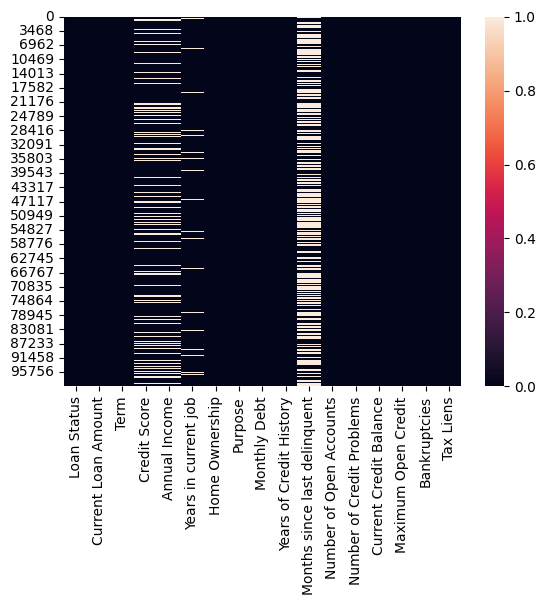

In [8]:
sns.heatmap(data.isnull())

### Inferences-
1. We can observe most of the null values in `Credit Score` and `Annual Income` are consistant.
2. Also feature `Month since last delinquent` consist more tham 50% null value.

In [9]:
cat = [i for i in data.columns if data[i].dtypes == 'O']
num = [i for i in data.columns if data[i].dtypes != 'O']

In [10]:
print('Categorical Features :', cat)
print('No. of Categorical Features:', len(cat))
print('-----------------------------------------------------------------------------------------------------')
print('Numeric Features :', num)
print('No. of Numeric Features:', len(num))
print('-----------------------------------------------------------------------------------------------------')

Categorical Features : ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
No. of Categorical Features: 5
-----------------------------------------------------------------------------------------------------
Numeric Features : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
No. of Numeric Features: 12
-----------------------------------------------------------------------------------------------------


## Outlier Detection

In [11]:
cols = ['Credit Score', 'Annual Income', 'Months since last delinquent']

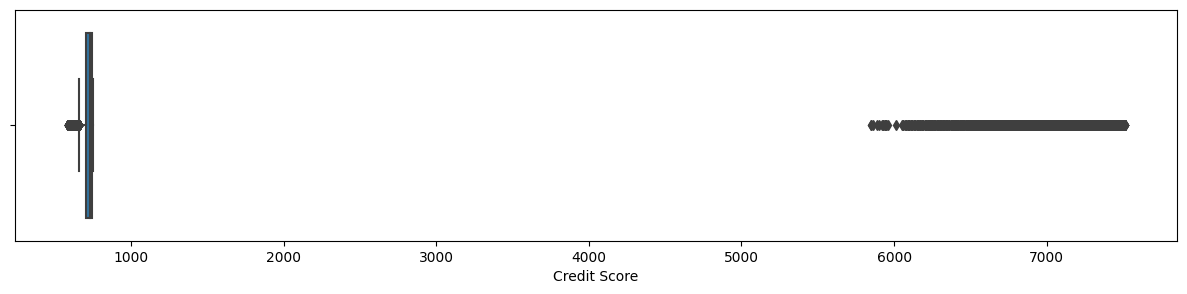

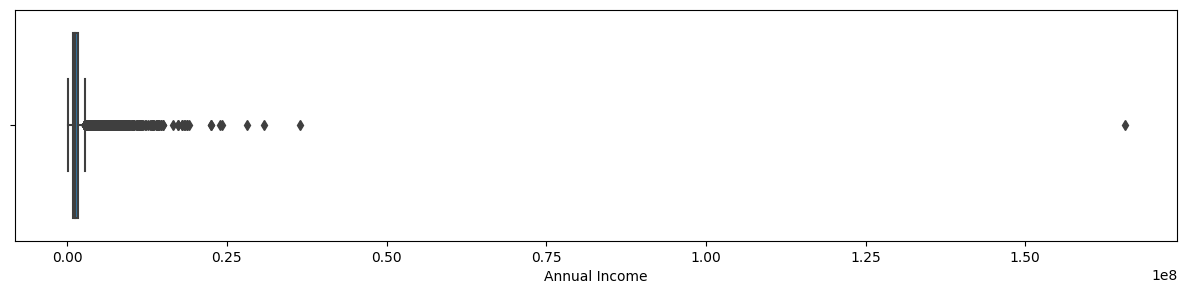

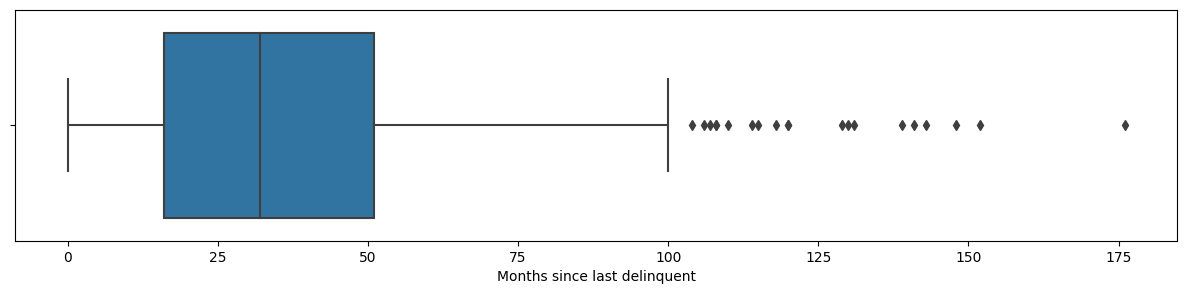

In [12]:
for i in (cols):
    figure = plt.figure(figsize = (15,3))
    sns.boxplot(data = data, x = i)
    plt.show()

We can observe that almost every column has outliers and hence I need to remove these outliers.

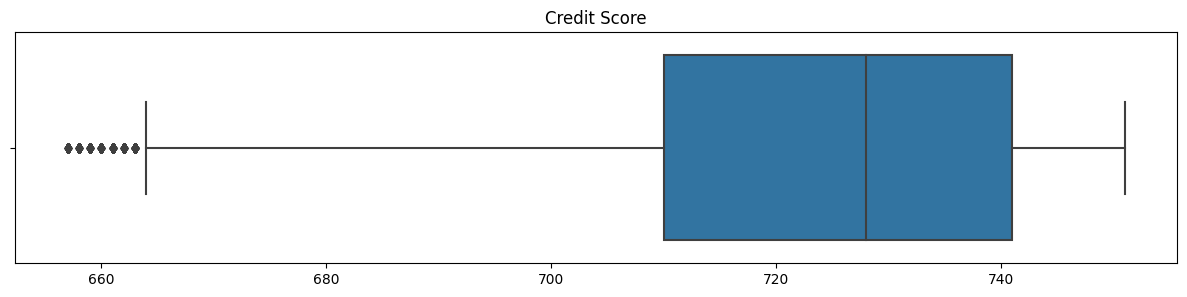

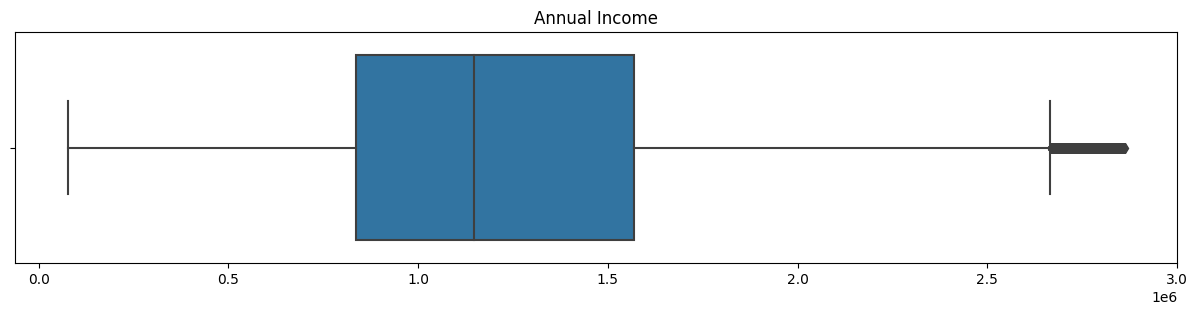

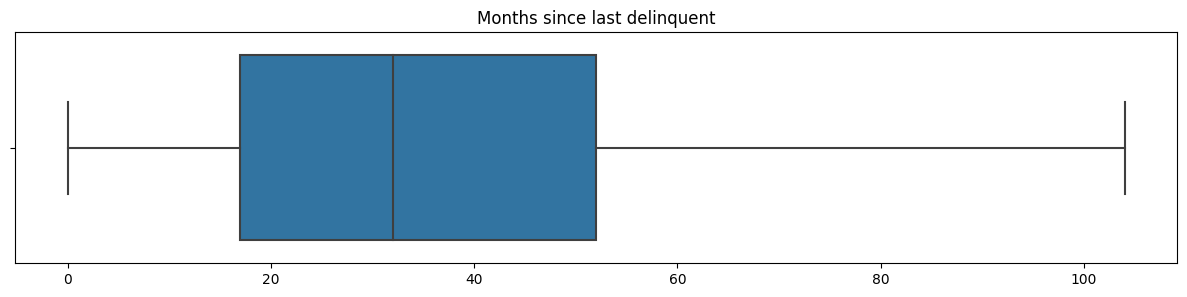

In [13]:
for i in cols:
    figure = plt.figure(figsize = (15,3))
    Q1 = data[i].quantile(0.25, interpolation='midpoint')
    Q3 = data[i].quantile(0.75, interpolation='midpoint')
    IQR = Q3 - Q1 
    Min_out = data[i] < Q1 - 1.5*IQR
    Max_out = data[i] > Q3 + 1.5*IQR
    data = data[~(Min_out | Max_out)]
    sns.boxplot(x = data[i])
    plt.xlabel('')
    plt.title(i)
    plt.show()

In [14]:
data.shape

(79584, 17)

In [15]:
for i in cat:
    print(i + ": "+ str(data[i].unique()))
    print("--------------------------------------------------------------------------------------------------------------")

Loan Status: ['Fully Paid' 'Charged Off' nan]
--------------------------------------------------------------------------------------------------------------
Term: ['Short Term' 'Long Term' nan]
--------------------------------------------------------------------------------------------------------------
Years in current job: ['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
--------------------------------------------------------------------------------------------------------------
Home Ownership: ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage' nan]
--------------------------------------------------------------------------------------------------------------
Purpose: ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'Take a Trip' 'Other' 'small_business'
 'Medical Bills' 'wedding' 'vacation' 'major_purchase'
 'Educational Expenses' 'moving' 'renewable_energy' nan]
----------

In [16]:
for i in cat:
    print(i + ": "+ str(data[i].nunique()))
    print("---------------------------------------------------------------------------------------------------------------")

Loan Status: 2
---------------------------------------------------------------------------------------------------------------
Term: 2
---------------------------------------------------------------------------------------------------------------
Years in current job: 11
---------------------------------------------------------------------------------------------------------------
Home Ownership: 4
---------------------------------------------------------------------------------------------------------------
Purpose: 16
---------------------------------------------------------------------------------------------------------------


In [17]:
for i in cat:
    print(data[i].value_counts())
    print("-----------------------------------------------------------------------------------------------------------")

Loan Status
Fully Paid     62820
Charged Off    16763
Name: count, dtype: int64
-----------------------------------------------------------------------------------------------------------
Term
Short Term    60589
Long Term     18994
Name: count, dtype: int64
-----------------------------------------------------------------------------------------------------------
Years in current job
10+ years    24462
2 years       7316
< 1 year      6574
3 years       6514
5 years       5467
1 year        5163
4 years       4932
6 years       4578
7 years       4372
8 years       3641
9 years       3125
Name: count, dtype: int64
-----------------------------------------------------------------------------------------------------------
Home Ownership
Home Mortgage    38232
Rent             33925
Own Home          7260
HaveMortgage       166
Name: count, dtype: int64
-----------------------------------------------------------------------------------------------------------
Purpose
Debt Consolidation  

In [18]:
data['Home Ownership'] = data['Home Ownership'].replace({'HaveMortgage' : 'Home Mortgage'})
data['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    38398
Rent             33925
Own Home          7260
Name: count, dtype: int64

## Treating Missing Values

In [19]:
data.isnull().sum()

Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19148
Annual Income                   19148
Years in current job             3440
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    43188
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 2
Bankruptcies                      167
Tax Liens                           9
dtype: int64

In [20]:
data = data.dropna(how = 'all')

In [21]:
data['Credit Score'] = data['Credit Score'].fillna(data['Credit Score'].mean())
data['Annual Income'] = data['Annual Income'].fillna(data['Annual Income'].mean())
data['Months since last delinquent'] = data['Months since last delinquent'].fillna(data['Months since last delinquent'].mean())
data['Maximum Open Credit'] = data['Maximum Open Credit'].fillna(data['Maximum Open Credit'].median())
data['Bankruptcies'] = data['Bankruptcies'].fillna(data['Bankruptcies'].median())
data['Tax Liens'] = data['Tax Liens'].fillna(data['Tax Liens'].median())

In [22]:
data['Years in current job'] = data['Years in current job'].fillna('10+ years')

In [23]:
data.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

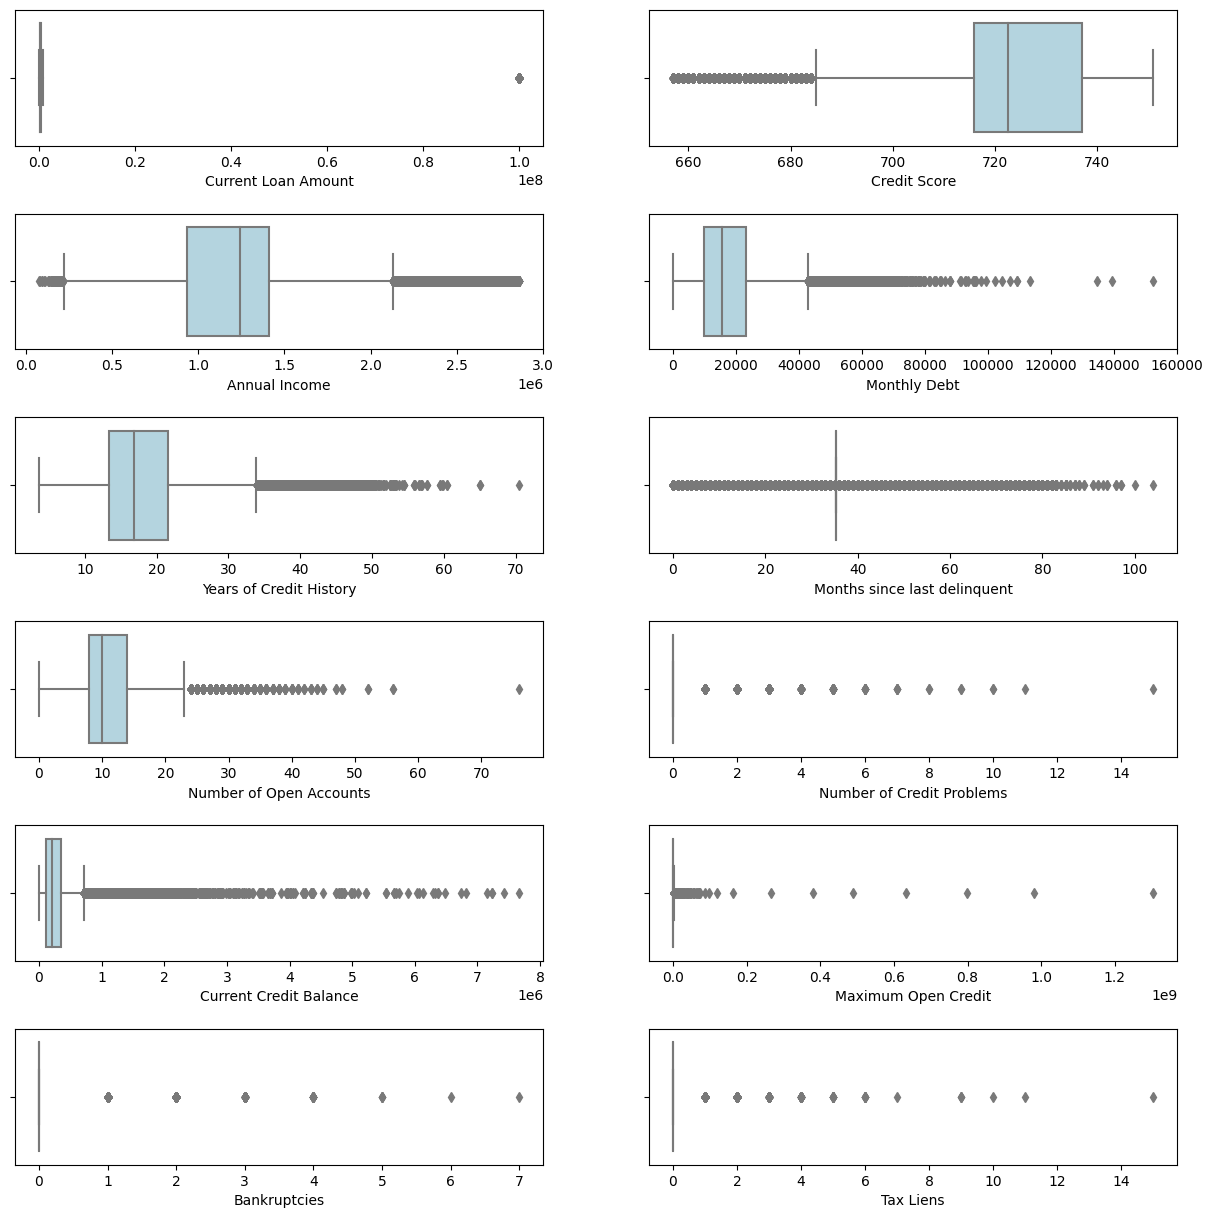

In [24]:
figure = plt.figure(figsize = (15,15))
for i,j in itertools.zip_longest(num, range(1,13)):
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.subplot(6,2,j)
    sns.boxplot(data = data, x = i, color = 'lightblue')

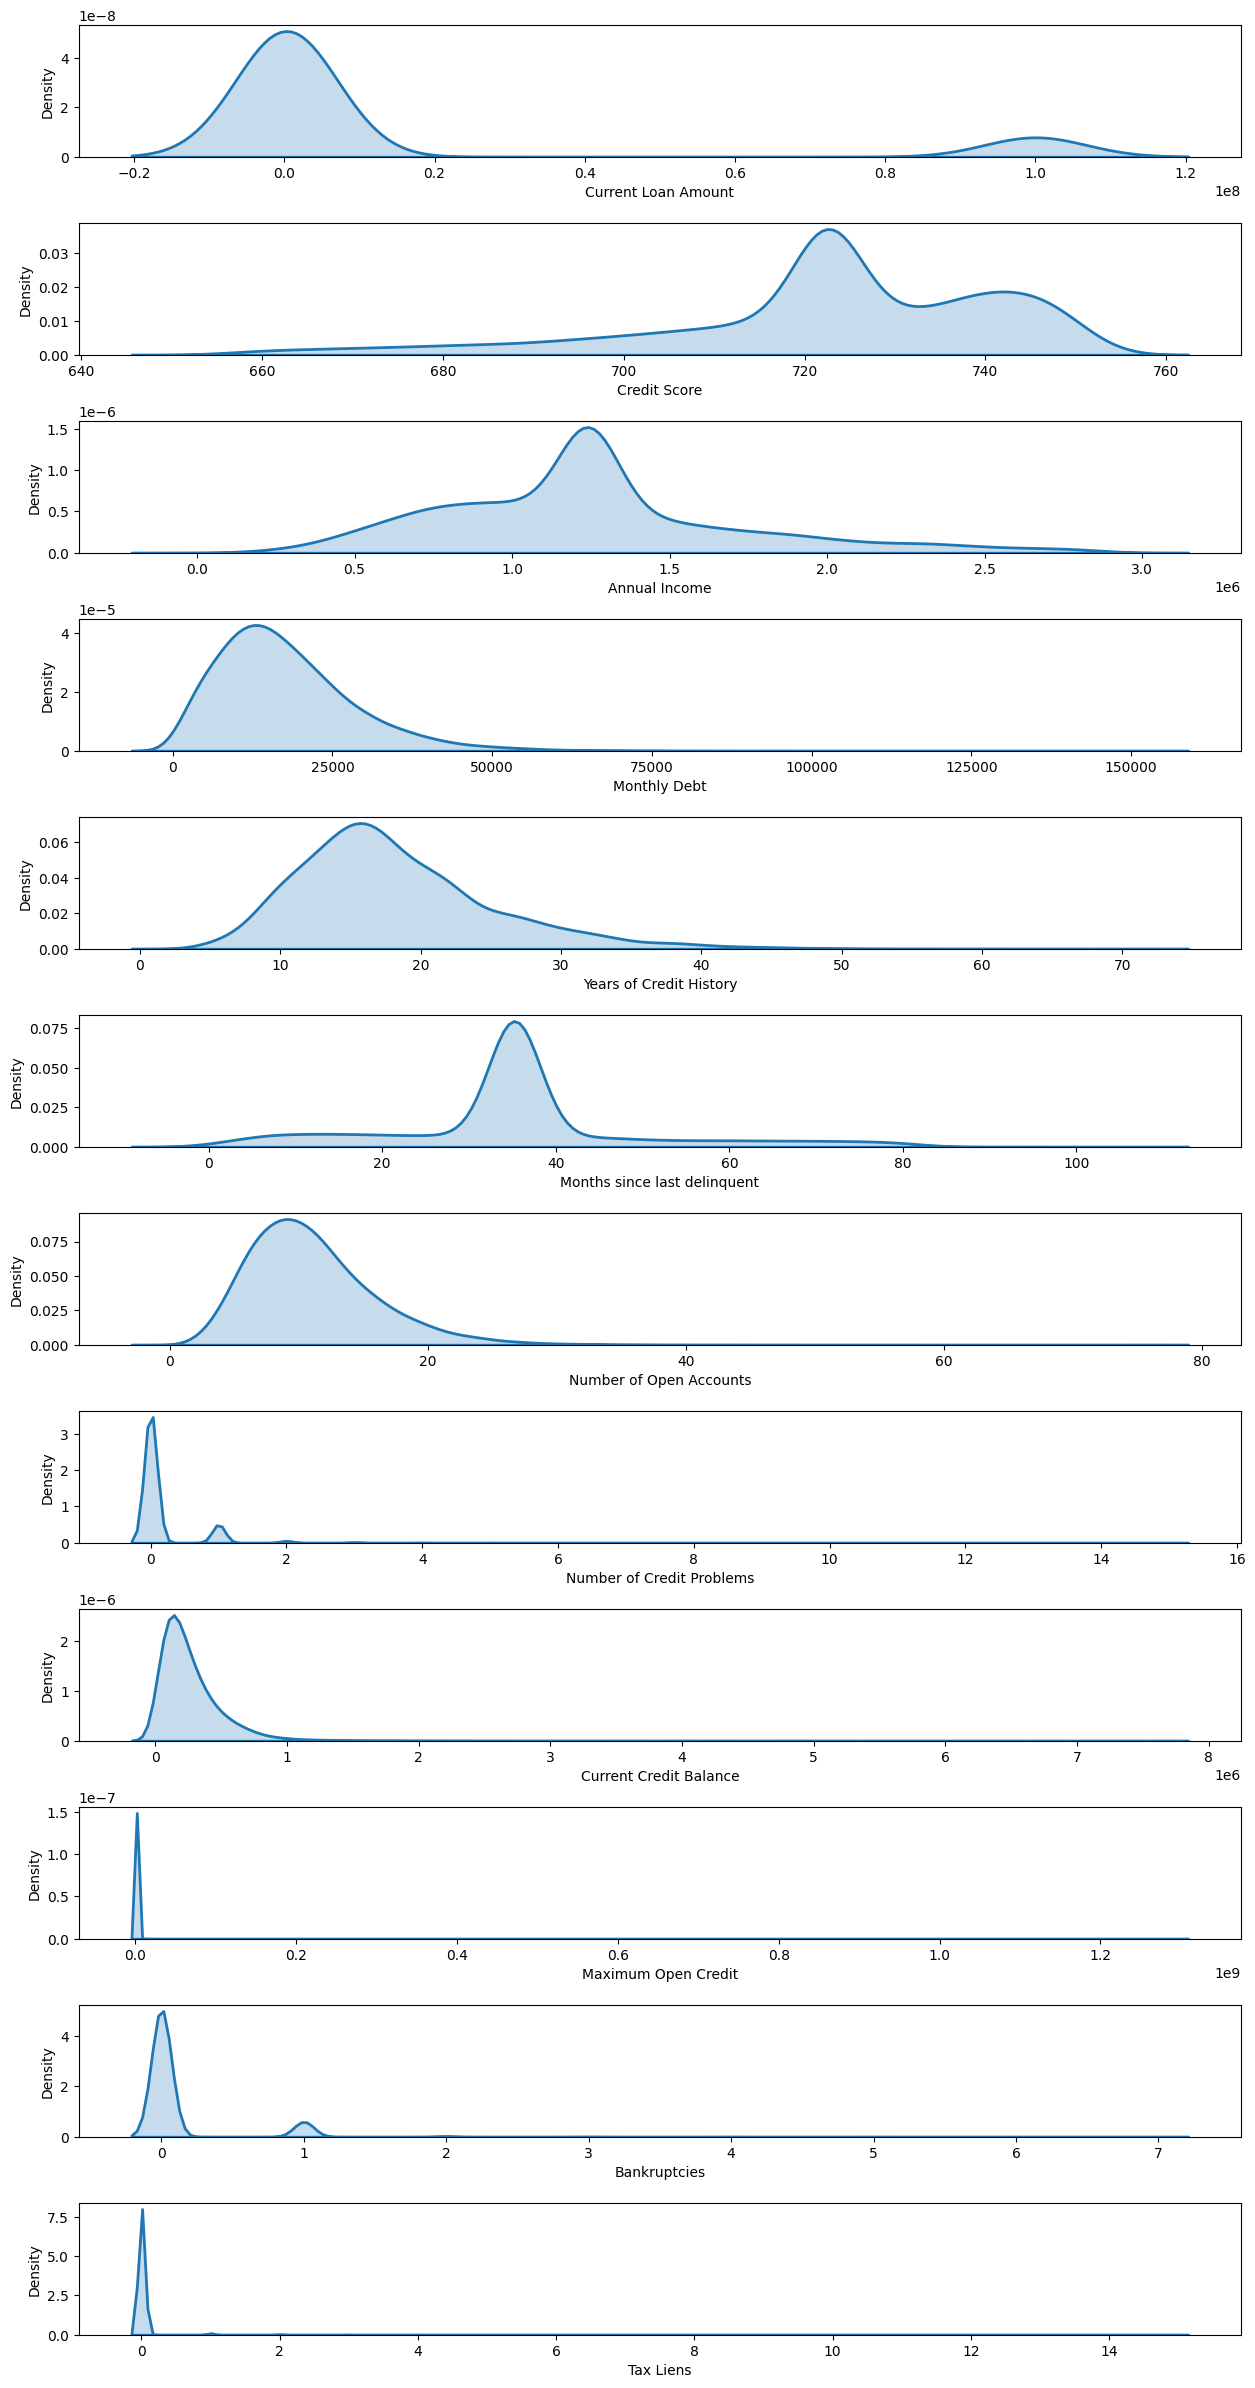

In [25]:
figure = plt.figure(figsize = (15,30))
for i,j in itertools.zip_longest(num, range(1,13)):
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.subplot(12,1,j)
    sns.kdeplot(data = data, x = i, fill=True, linewidth=2, bw_method=0.2)   

## Categorical Features

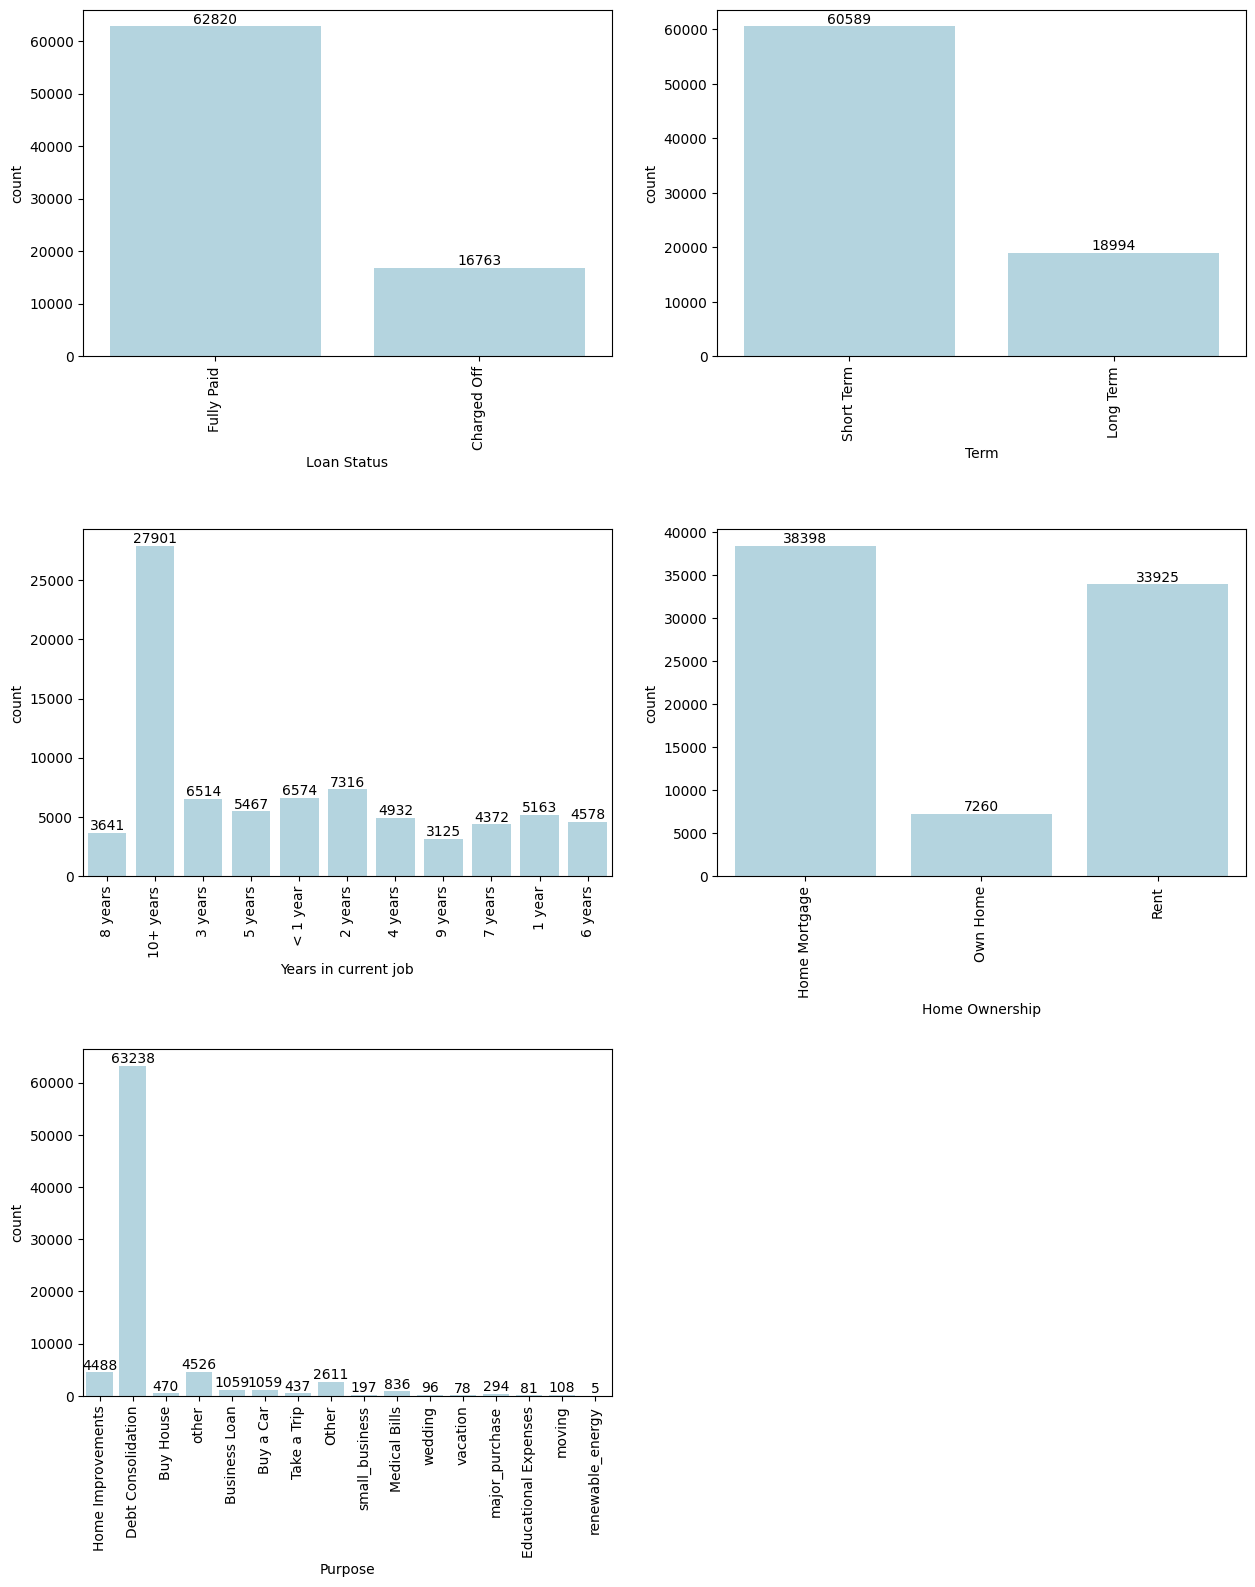

In [26]:
figure = plt.figure(figsize = (15,18))
for i,j in itertools.zip_longest(cat, range(1,6)):
    plt.subplot(3,2,j)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    ax = sns.countplot(data = data, x = i, linewidth=2, color = 'lightblue')
    plt.xticks(rotation = 90)
    ax.bar_label(ax.containers[0])

## Correlation between Numeric Features

<Axes: >

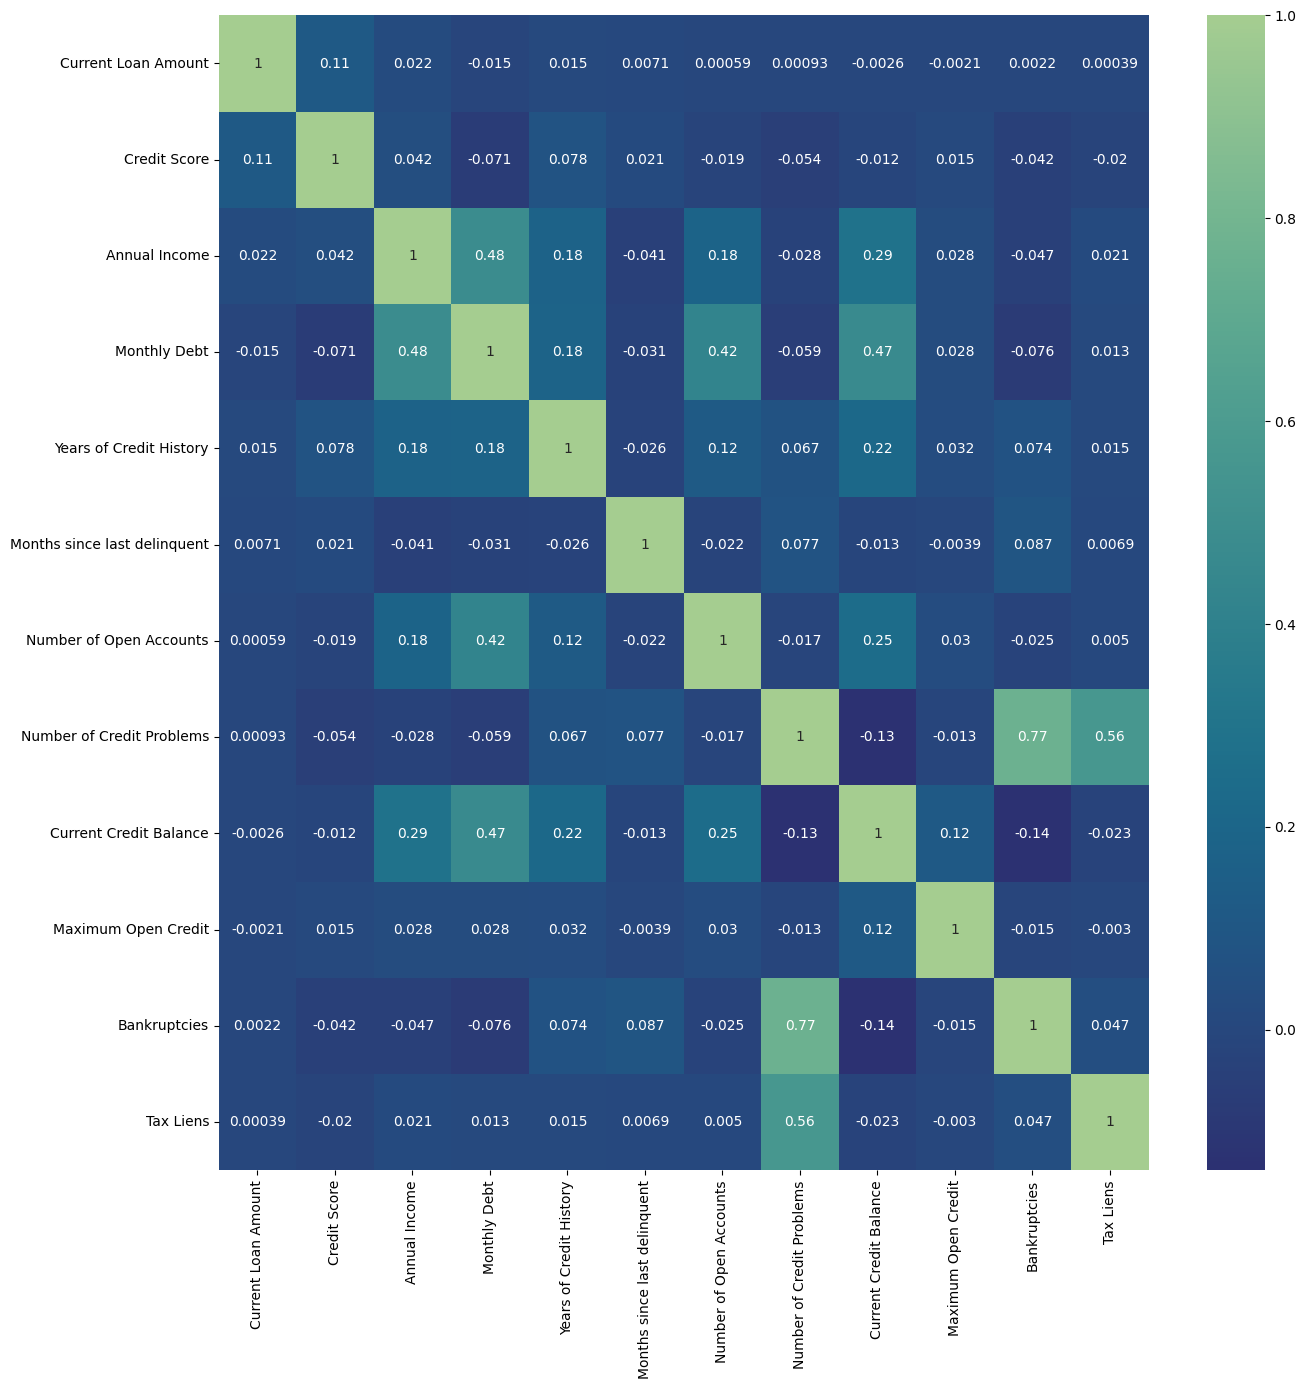

In [27]:
figure = plt.figure(figsize = (15,15))
num_data = data[num]
sns.heatmap(num_data.corr(), annot = True, cmap = 'crest_r' )

## Encoding Categorical Features

In [28]:
cat

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

In [29]:
encoder = OrdinalEncoder()

In [32]:
f_encode = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

data[f_encode] = encoder.fit_transform(data[f_encode])
encoder.categories_

[array(['Long Term', 'Short Term'], dtype=object),
 array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
        '6 years', '7 years', '8 years', '9 years', '< 1 year'],
       dtype=object),
 array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object),
 array(['Business Loan', 'Buy House', 'Buy a Car', 'Debt Consolidation',
        'Educational Expenses', 'Home Improvements', 'Medical Bills',
        'Other', 'Take a Trip', 'major_purchase', 'moving', 'other',
        'renewable_energy', 'small_business', 'vacation', 'wedding'],
       dtype=object)]

In [34]:
# lets now encode the output feature as if full paid then 0 else 1.
data['Loan Status'] = np.where(data['Loan Status'] == 'Fully Paid', 0,1)

In [36]:
scaler = StandardScaler()

In [37]:
data[num] = scaler.fit_transform(data[num])

In [38]:
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,-0.388505,1.0,-0.714079,-0.159995,8.0,0.0,5.0,-1.145473,-0.138280,0.000000,-1.021128,1.769641,-0.165000,-0.041783,2.520480,-0.109113
1,0,-0.393901,1.0,0.000000,0.000000,1.0,0.0,3.0,1.462698,0.419417,-1.837510,4.860486,-0.349843,-0.159042,0.017059,-0.335588,-0.109113
2,0,2.545477,1.0,0.962976,2.086307,8.0,1.0,3.0,1.082315,-0.467179,-0.421152,1.412643,1.769641,0.067863,0.003408,-0.335588,-0.109113
3,0,-0.391386,0.0,-0.085183,-0.920884,3.0,1.0,3.0,-0.817872,-0.881876,0.000000,-0.412685,-0.349843,-0.071132,-0.045821,-0.335588,-0.109113
4,0,-0.396439,1.0,0.000000,0.000000,5.0,2.0,3.0,0.287189,-1.725572,0.000000,0.804200,-0.349843,-0.080703,-0.040369,-0.335588,-0.109113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,-0.395426,1.0,-0.189999,-0.970605,0.0,0.0,7.0,-1.283597,-0.109680,-1.163053,-1.021128,-0.349843,-0.924688,-0.063146,-0.335588,-0.109113
99996,0,2.545477,1.0,0.491304,0.097311,0.0,2.0,3.0,-0.412254,-1.253674,-0.960717,2.223900,-0.349843,-0.415673,-0.029244,-0.335588,-0.109113
99997,0,-0.398593,1.0,1.015383,-0.195762,6.0,2.0,3.0,-0.950349,0.090518,-1.163053,0.195758,1.769641,-0.560753,-0.025406,2.520480,-0.109113
99998,0,-0.386003,1.0,1.225015,1.000788,9.0,2.0,3.0,-0.711231,-0.452879,0.000000,-0.615500,-0.349843,0.422228,0.001804,-0.335588,-0.109113


----

## Data Preparation  for Model

In [56]:
y = data['Loan Status']
X = data.drop(columns = ['Loan Status'])

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [58]:
lr_model = LogisticRegression()

In [59]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [60]:
coefficients = lr_model.coef_[0]

<Axes: xlabel='feature_importance', ylabel='Features'>

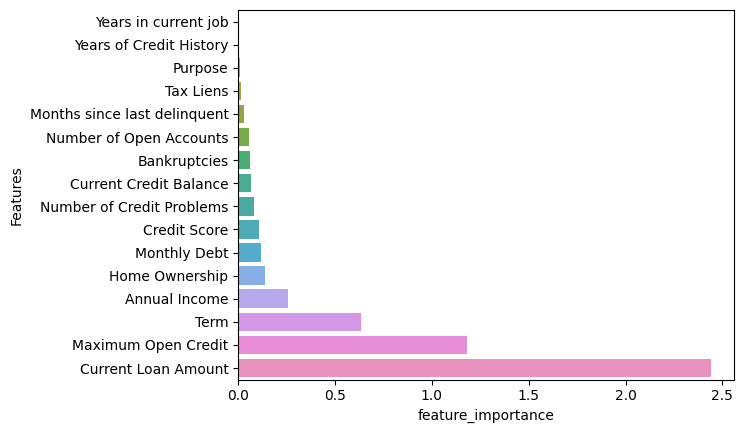

In [61]:
important_features = pd.DataFrame({'Features': X.columns, 'feature_importance':np.abs(coefficients)})
important_features = important_features.sort_values(by = 'feature_importance', ascending = True)
sns.barplot(data = important_features, x = 'feature_importance', y = 'Features')

In [62]:
lr_pred = lr_model.predict(x_test)

In [71]:
accuracy = accuracy_score(y_test,lr_pred)
print('Accuracy: ', accuracy)
print('')
print('------------------------------------------------------------------------------------------------------------------')
cm = confusion_matrix(y_test, lr_pred)
print(cm , ': Confusion Matrics')
print('')
print('------------------------------------------------------------------------------------------------------------------')
precision = precision_score(y_test,lr_pred)
print('Precision Score: ', precision)
print('')
print('------------------------------------------------------------------------------------------------------------------')
recall = recall_score(y_test,lr_pred)
print('Recall: ', recall)
print('')
print('------------------------------------------------------------------------------------------------------------------')

Accuracy:  0.7883560209424084

------------------------------------------------------------------------------------------------------------------
[[18791    27]
 [ 5026    31]] : Confusion Matrics

------------------------------------------------------------------------------------------------------------------
Precision Score:  0.5344827586206896

------------------------------------------------------------------------------------------------------------------
Recall:  0.006130116669962428

------------------------------------------------------------------------------------------------------------------


TypeError: 'numpy.float64' object is not callable

### Hyperparameter Tunning for Logistic Regression Model

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [76]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

In [77]:
grid_lr = GridSearchCV(estimator = lr_model, param_grid = param_grid, cv = 5)

In [78]:
grid_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [80]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_lr.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_lr.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.7892190739460954


In [81]:
lr_grid_pred = grid_lr.predict(x_test)

In [82]:
accuracy = accuracy_score(y_test,lr_grid_pred)
print('Accuracy: ', accuracy)
print('')
print('------------------------------------------------------------------------------------------------------------------')
cm = confusion_matrix(y_test, lr_grid_pred)
print(cm , ': Confusion Matrics')
print('')
print('------------------------------------------------------------------------------------------------------------------')
precision = precision_score(y_test,lr_grid_pred)
print('Precision Score: ', precision)
print('')
print('------------------------------------------------------------------------------------------------------------------')
recall = recall_score(y_test,lr_grid_pred)
print('Recall: ', recall)
print('')
print('------------------------------------------------------------------------------------------------------------------')
f1_score = f1_score(y_test, lr_grid_pred)
print('f1_score: ', f1_score)
print('')
print('------------------------------------------------------------------------------------------------------------------')

Accuracy:  0.7892190739460954

------------------------------------------------------------------------------------------------------------------
[[12550    12]
 [ 3343    12]] : Confusion Matrics

------------------------------------------------------------------------------------------------------------------
Precision Score:  0.5

------------------------------------------------------------------------------------------------------------------
Recall:  0.0035767511177347243

------------------------------------------------------------------------------------------------------------------
f1_score:  0.0071026931044687784

------------------------------------------------------------------------------------------------------------------


----

## Decision Tree Classifier 

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [87]:
model = DecisionTreeClassifier(random_state = 0)

In [88]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [89]:
dct_pred = model.predict(x_test)

In [92]:
accuracy = accuracy_score(y_test, dct_pred)
print("Accuracy:", accuracy)
print('------------------------------------------------------------------------------------------------------------------')
report = classification_report(y_test, dct_pred)
print("Classification Report:")
print(report)

Accuracy: 0.6978073757617641
------------------------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     12562
           1       0.30      0.31      0.30      3355

    accuracy                           0.70     15917
   macro avg       0.55      0.56      0.56     15917
weighted avg       0.70      0.70      0.70     15917



### Hyperparameter Tunning for Decision Tree Classifier

In [93]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [94]:
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [97]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print( 'Best Parameters :', best_params)
print('Best Model :', best_model)

Best Parameters : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model : DecisionTreeClassifier(max_depth=3, random_state=0)


In [99]:
grid_dct_pred = best_model.predict(x_test)

In [101]:
# Evaluate the best model's accuracy
accuracy = accuracy_score(y_test, grid_dct_pred)
print("Best Model Accuracy:", accuracy)
print('------------------------------------------------------------------------------------------------------------------')
# Generate a classification report for the best model
report = classification_report(y_test, grid_dct_pred)
print("Best Model Classification Report:")
print(report)

Best Model Accuracy: 0.7892190739460954
------------------------------------------------------------------------------------------------------------------
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     12562
           1       0.00      0.00      0.00      3355

    accuracy                           0.79     15917
   macro avg       0.39      0.50      0.44     15917
weighted avg       0.62      0.79      0.70     15917



## Random Forest Classifier

In [102]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [103]:
rf_model = RandomForestClassifier(random_state = 42)

In [104]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
rf_pred = rf_model.predict(x_test)

In [106]:

report = classification_report(y_test, rf_pred)
print("Best Model Classification Report:")
print(report)

Best Model Accuracy: 0.7899101589495507
------------------------------------------------------------------------------------------------------------------
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     12562
           1       0.52      0.05      0.09      3355

    accuracy                           0.79     15917
   macro avg       0.66      0.52      0.49     15917
weighted avg       0.74      0.79      0.71     15917



### Hyperparameter Tunning for Random Forest Classifier

In [116]:
rf_param_dist = {
    'n_estimators': range(100, 500, 50),
    'max_depth': range(30, 200, 10),
    'min_samples_split': range(5, 40, 5),
    'min_samples_leaf': range(5, 40, 5),
    'bootstrap': [True, False]
}

In [120]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    scoring='f1', 
    cv=5,  # Number of cross-validation folds
#     verbose=1,
    random_state=42,
)


In [121]:
random_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(30, 200, 10),
                                        'min_samples_leaf': range(5, 40, 5),
                                        'min_samples_split': range(5, 40, 5),
                                        'n_estimators': range(100, 500, 50)},
                   random_state=42, scoring='f1')

In [123]:
best_params = random_rf_model.best_params_
best_model = random_rf_model.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Score:", best_model.score(x_test, y_test))

Best Parameters: {'n_estimators': 200, 'min_samples_split': 25, 'min_samples_leaf': 10, 'max_depth': 70, 'bootstrap': False}
Best Model Score: 0.7894703775837155


In [124]:
rf_tune = RandomForestClassifier(random_state=42, n_estimators=200, min_samples_split= 25,
                                 min_samples_leaf= 10, max_depth= 70, bootstrap= False)


In [126]:
rf_tune.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=10,
                       min_samples_split=25, n_estimators=200, random_state=42)

In [128]:
rf_tune_pred = rf_tune.predict(x_test)

In [129]:
report = classification_report(y_test, rf_tune_pred)
print("Best Model Classification Report:")
print(report)

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     12562
           1       0.51      0.03      0.06      3355

    accuracy                           0.79     15917
   macro avg       0.65      0.51      0.47     15917
weighted avg       0.73      0.79      0.71     15917



In [130]:
cm = confusion_matrix(y_test, lr_grid_pred)
print(cm , ': Confusion Matrics')

[[12550    12]
 [ 3343    12]] : Confusion Matrics


----

## Out of 3 model Random Forest Model has performed the best.